In [10]:
# MAP Estimator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Datos (mismos del ejercicio anterior)
np.random.seed(42)
mu_real = 170
sigma_datos = 10
n = 500
datos = np.random.normal(mu_real, sigma_datos, n)

In [3]:
# Definición del Prior (Nuestra creencia previa)
mu_prior = 185    # Creíamos que eran más altos (por ejemplo)
sigma_prior = 2   # Tenemos mucha certeza en nuestra creencia previa (sigma pequeña)



$$P(\mu | x) \propto \underbrace{\prod_{i=1}^{n} P(x_i | \mu)}_{\text{Verosimilitud}} \times \underbrace{P(\mu)}_{\text{Prior}}$$

$$ P(\mu | x) = l(\mu) + ln ( P(\mu))$$

$$\hat{\mu}_{MAP} = \arg\max_{\mu} \left[ \ell(\mu) + \log P(\mu) \right]$$

In [4]:
def log_verosimilitud(mu, sigma, x):
    n = len(x)
    term1 = - (n / 2) * np.log(2 * np.pi * sigma**2)
    term2 = - (1 / (2 * sigma**2)) * np.sum((x - mu)**2)
    return term1 + term2

In [5]:
# Función Log-Posteriori (Log-Verosimilitud + Log-Prior)
def log_posteriori(mu, x, sigma_d, mu_p, sigma_p):
    # Log-Verosimilitud
    log_lik = - (len(x) / 2) * np.log(2 * np.pi * sigma_d**2) - (1 / (2 * sigma_d**2)) * np.sum((x - mu)**2)
    # Log-Prior
    log_prior = - 0.5 * np.log(2 * np.pi * sigma_p**2) - (1 / (2 * sigma_p**2)) * (mu - mu_p)**2
    return log_lik + log_prior

In [6]:
# Cálculo
rango_mu = np.linspace(160, 190, 200)
vals_mle = [log_verosimilitud(m, sigma_datos, datos) for m in rango_mu] # Función anterior
vals_map = [log_posteriori(m, datos, sigma_datos, mu_prior, sigma_prior) for m in rango_mu]


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_96112/677142142.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


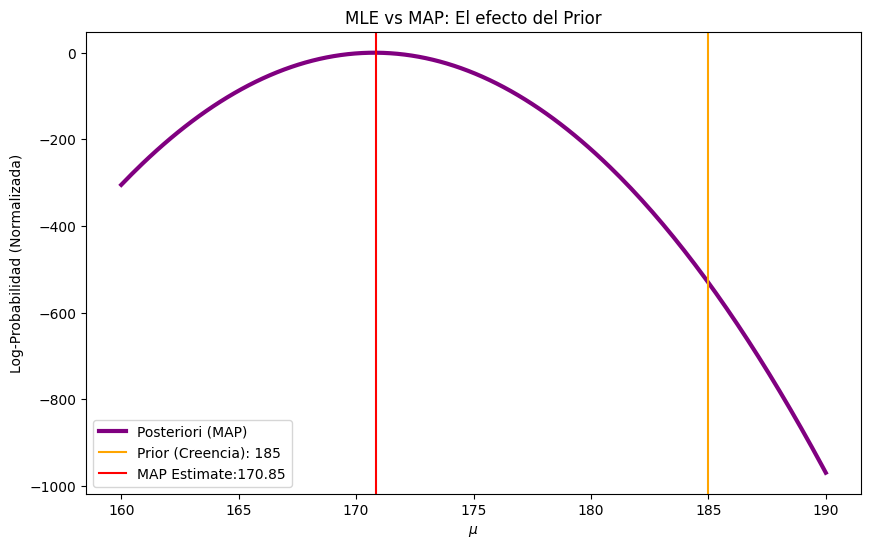

In [8]:
# Normalizamos para que se vean bien en el mismo gráfico (opcional)
mle_norm = vals_mle - np.max(vals_mle)
map_norm = vals_map - np.max(vals_map)

plt.figure(figsize=(10, 6))
plt.plot(rango_mu, map_norm, label='Posteriori (MAP)', color='purple', lw=3)
plt.axvline(mu_prior, color='orange', label=f'Prior (Creencia): {mu_prior}')
plt.axvline(rango_mu[np.argmax(map_norm)], color='red', label=f'MAP Estimate:{rango_mu[np.argmax(map_norm)]:.2f}')

plt.title('MLE vs MAP: El efecto del Prior')
plt.xlabel('$\mu$')
plt.ylabel('Log-Probabilidad (Normalizada)')
plt.legend()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_96112/2699268392.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


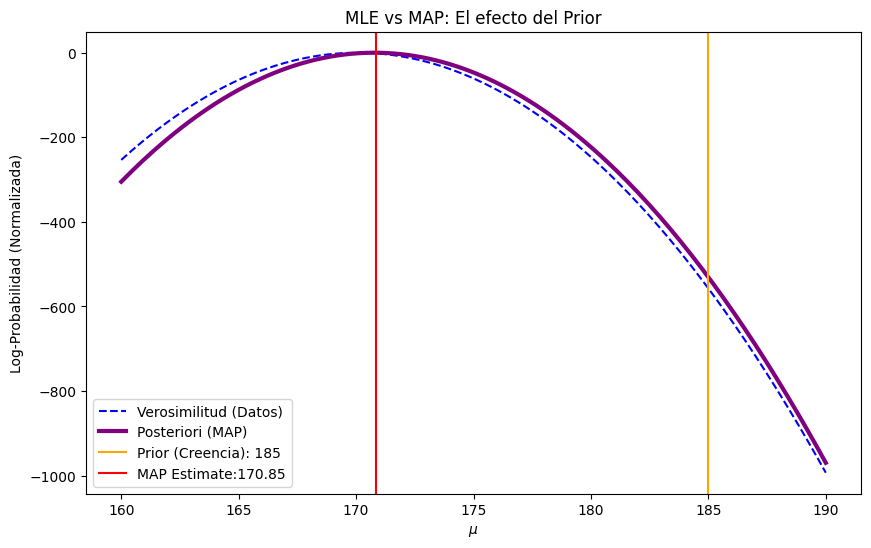

In [9]:
# Normalizamos para que se vean bien en el mismo gráfico (opcional)
mle_norm = vals_mle - np.max(vals_mle)
map_norm = vals_map - np.max(vals_map)

plt.figure(figsize=(10, 6))
plt.plot(rango_mu, mle_norm, label='Verosimilitud (Datos)', color='blue', linestyle='--')
plt.plot(rango_mu, map_norm, label='Posteriori (MAP)', color='purple', lw=3)
plt.axvline(mu_prior, color='orange', label=f'Prior (Creencia): {mu_prior}')
plt.axvline(rango_mu[np.argmax(map_norm)], color='red', label=f'MAP Estimate:{rango_mu[np.argmax(map_norm)]:.2f}')

plt.title('MLE vs MAP: El efecto del Prior')
plt.xlabel('$\mu$')
plt.ylabel('Log-Probabilidad (Normalizada)')
plt.legend()
plt.show()